In [1]:
%run ../methodes/perceptron_definition.ipynb import Perceptron_
import pandas as pd

# On récupère le dataframe d'entraînement stocké en mémoire
%store -r df_train

In [2]:
# Le terme de régularisation (penalty) est l'une des 3 fonctions suivantes
penaltys = ['l1', 'l2', 'elasticnet']

# Le taux d'apprentissage (learning rate) doit être entre 0 et 1
learning_rates = np.linspace(0.0001, 1, 5)

# La constante multiplicateur (alpha) du terme de régularisation doit être > 0
alphas = np.linspace(0.0000001, 0.001, 5)

In [3]:
# Initialisation des meilleurs paramètres
err_min = 100
perceptron_best_penalty = 'Nothing'
perceptron_best_learning_rate = -1
perceptron_best_alpha = -2

In [4]:
# Initialisation des tableaux pour l'analyse des données
df_l1_train = pd.DataFrame(0, index=alphas, columns=learning_rates)
df_l2_train = pd.DataFrame(0, index=alphas, columns=learning_rates)
df_elasticnet_train = pd.DataFrame(0, index=alphas, columns=learning_rates)
df_l1_test = pd.DataFrame(0, index=alphas, columns=learning_rates)
df_l2_test = pd.DataFrame(0, index=alphas, columns=learning_rates)
df_elasticnet_test = pd.DataFrame(0, index=alphas, columns=learning_rates)

In [5]:
%%capture --no-display
%run utils.ipynb import K_Fold

for penalty in penaltys:
    for learning_rate in learning_rates:
        for alpha in alphas:
            
            # Validation croisée avec K_Fold
            err_train, err_test = K_Fold(10, df_train, Perceptron_(penalty, learning_rate, alpha))

            # Calcul de l'erreur totale
            err = (err_train + err_test) / 2 

            # On garde les données en mémoire
            if penalty == 'l1':
                df_l1_train[learning_rate][alpha] = err_train
                df_l1_test[learning_rate][alpha] = err_test
            elif penalty == 'l2':
                df_l2_train[learning_rate][alpha] = err_train
                df_l2_test[learning_rate][alpha] = err_test
            elif penalty == 'elasticnet':
                df_elasticnet_train[learning_rate][alpha] = err_train
                df_elasticnet_test[learning_rate][alpha] = err_test
                
            # On met à jour les meilleurs paramètres
            if err < err_min:
                err_min = err
                perceptron_best_penalty = penalty
                perceptron_best_learning_rate = learning_rate
                perceptron_best_alpha = alpha

Text(0.5, 1.0, 'l2')

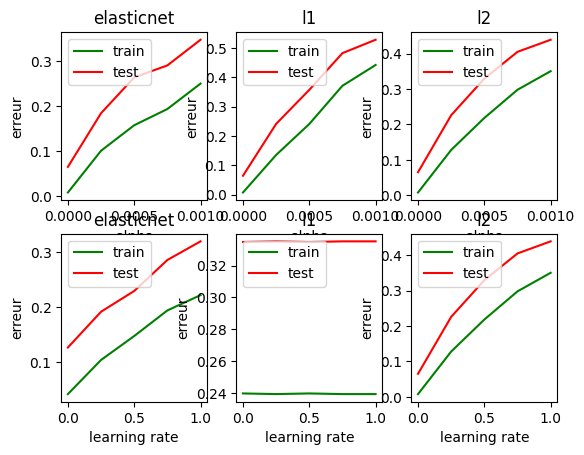

In [6]:
import matplotlib.pyplot as plt
# Représentation graphique

# Evolution de l'erreur moyenne en fonction de alpha
plt.subplot(2,3,1) # elasticnet
plot_df(df_elasticnet_train, df_elasticnet_test, 'alpha', 'index', True)
plt.title('elasticnet')

plt.subplot(2,3,2) # l1
plot_df(df_l1_train, df_l1_test, 'alpha', 'index', True)
plt.title('l1')

plt.subplot(2,3,3) # l2
plot_df(df_l2_train, df_l2_test, 'alpha', 'index', True)
plt.title('l2')

# Evolution de l'erreur moyenne en fonction du learning rate
plt.subplot(2,3,4) # elasticnet
plot_df(df_elasticnet_train, df_elasticnet_test, 'learning rate', 'columns', True)
plt.title('elasticnet')

plt.subplot(2,3,5) # l1
plot_df(df_l1_train, df_l1_test, 'learning rate', 'columns', True)
plt.title('l1')

plt.subplot(2,3,6) # l2
plot_df(df_l2_train, df_l2_test, 'learning rate', 'columns', True)
plt.title('l2')

In [7]:
# Affichage des meilleurs hyperparamètres trouvés
print('err_min : ', err_min, ' | penalty : ', perceptron_best_penalty, 
      ' | learning_rate : ', perceptron_best_learning_rate, ' | alpha : ', perceptron_best_alpha)

err_min :  0.036026936026936025  | penalty :  l2  | learning_rate :  0.0001  | alpha :  1e-07


In [8]:
# On stocke en mémoire les meilleurs hyperparamètres trouvés
%store perceptron_best_penalty
%store perceptron_best_learning_rate
%store perceptron_best_alpha

Stored 'perceptron_best_penalty' (str)
Stored 'perceptron_best_learning_rate' (float64)
Stored 'perceptron_best_alpha' (float64)
